In [26]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

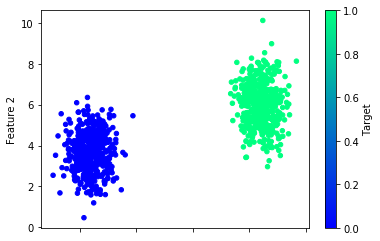

In [27]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [28]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =78)

In [29]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [31]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [32]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [33]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [35]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
750/750 [==============================] - 0s 173us/sample - loss: 0.5591 - acc: 1.0000
Epoch 2/100
750/750 [==============================] - 0s 40us/sample - loss: 0.5470 - acc: 1.0000
Epoch 3/100
750/750 [==============================] - 0s 41us/sample - loss: 0.5344 - acc: 1.0000
Epoch 4/100
750/750 [==============================] - 0s 39us/sample - loss: 0.5218 - acc: 1.0000
Epoch 5/100
750/750 [==============================] - 0s 41us/sample - loss: 0.5089 - acc: 1.0000
Epoch 6/100
750/750 [==============================] - 0s 64us/sample - loss: 0.4958 - acc: 1.0000
Epoch 7/100
750/750 [==============================] - 0s 40us/sample - loss: 0.4828 - acc: 1.0000
Epoch 8/100
750/750 [==============================] - 0s 37us/sample - loss: 0.4698 - acc: 1.0000
Epoch 9/100
750/750 [==============================] - ETA: 0s - loss: 0.4591 - acc: 1.000 - 0s 85us/sample - loss: 0.4569 - acc: 1.0000
Epoch 10/100
750/750 [==============================] - 0s 47us/sample

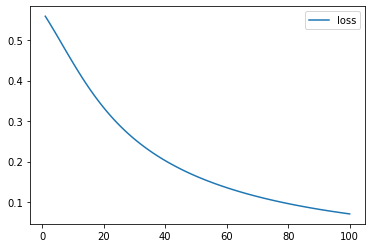

In [36]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")


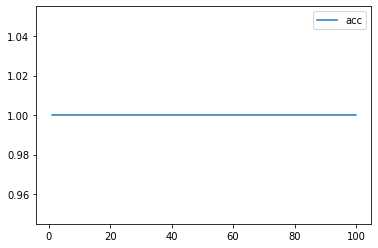

In [37]:
# Plot the accuracy
history_df.plot(y="acc")


In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


250/250 - 0s - loss: 0.0661 - acc: 1.0000
Loss: 0.06611750972270966, Accuracy: 1.0


In [39]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

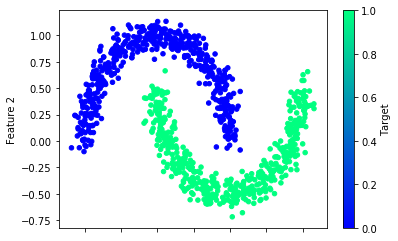

In [40]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")


In [41]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)


In [42]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
750/750 [==============================] - 0s 36us/sample - loss: 1.0302 - acc: 0.5107
Epoch 2/100
750/750 [==============================] - 0s 47us/sample - loss: 0.9185 - acc: 0.5267
Epoch 3/100
750/750 [==============================] - 0s 37us/sample - loss: 0.8430 - acc: 0.5533
Epoch 4/100
750/750 [==============================] - 0s 37us/sample - loss: 0.7944 - acc: 0.5680
Epoch 5/100
750/750 [==============================] - 0s 35us/sample - loss: 0.7570 - acc: 0.5880
Epoch 6/100
750/750 [==============================] - 0s 36us/sample - loss: 0.7293 - acc: 0.5947
Epoch 7/100
750/750 [==============================] - 0s 43us/sample - loss: 0.7065 - acc: 0.6093
Epoch 8/100
750/750 [==============================] - 0s 36us/sample - loss: 0.6873 - acc: 0.6147
Epoch 9/100
750/750 [==============================] - 0s 37us/sample - loss: 0.6709 - acc: 0.6200
Epoch 10/100
750/750 [==============================] - 0s 32us/sample - loss: 0.6565 - acc: 0.6293
Epoch 11/

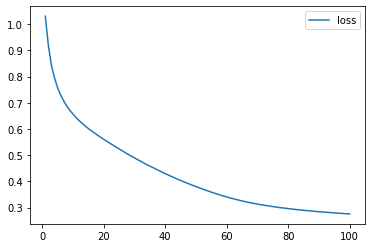

In [43]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")


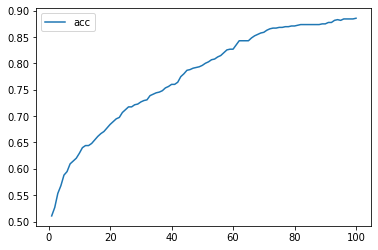

In [44]:
# Plot the loss
history_df.plot(y="acc")


In [45]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [46]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [47]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
750/750 [==============================] - 0s 620us/sample - loss: 0.6343 - acc: 0.4653
Epoch 2/100
750/750 [==============================] - 0s 48us/sample - loss: 0.6163 - acc: 0.5253
Epoch 3/100
750/750 [==============================] - 0s 60us/sample - loss: 0.5996 - acc: 0.6040
Epoch 4/100
750/750 [==============================] - 0s 65us/sample - loss: 0.5838 - acc: 0.6920
Epoch 5/100
750/750 [==============================] - 0s 60us/sample - loss: 0.5679 - acc: 0.7053
Epoch 6/100
750/750 [==============================] - 0s 44us/sample - loss: 0.5513 - acc: 0.7200
Epoch 7/100
750/750 [==============================] - 0s 47us/sample - loss: 0.5343 - acc: 0.7333
Epoch 8/100
750/750 [==============================] - 0s 43us/sample - loss: 0.5163 - acc: 0.7427
Epoch 9/100
750/750 [==============================] - 0s 45us/sample - loss: 0.4982 - acc: 0.7520
Epoch 10/100
750/750 [==============================] - 0s 43us/sample - loss: 0.4796 - acc: 0.7600
Epoch 11

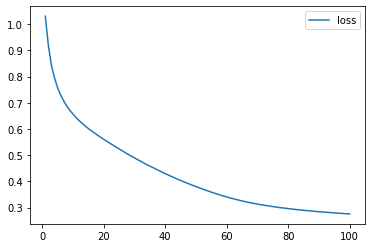

In [48]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

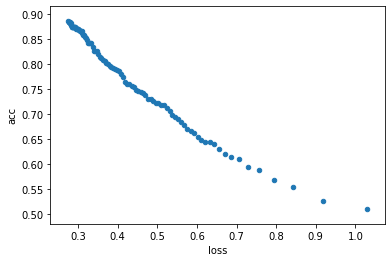

In [50]:
# Scatter plot (Skill Drill 19.2.6)
history_df.plot(kind='scatter',x='loss', y='acc')